In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
# install matplotlib_venn beforehand with: pip install matplotlib-venn
from matplotlib_venn import venn3, venn3_circles
%matplotlib notebook

# Tag comparison heatmap
Author: Vito Zanotelli

This reproduces the tag comparison heatmap from Supplementary Figure 3.


In [2]:
fn_analysis= '../example/testoutput/tags/bindat'

Run the adnet script with the configuration file '../example/config_tags.ini' to generate this file

In [3]:
bindat =pd.read_pickle(fn_analysis)

Prepare the matrix. bpR2 can be slighly negative, so set it to 0 to make the colorbar strictly positive.

In [4]:
heatmat = bindat[('stats', 'mean_var_ratio')].unstack('target')
# drop flag and GFP, as they are not used as readout
heatmat = heatmat.drop(['FLAG', 'GFP'], axis=1)
heatmat = heatmat.dropna(axis=1)
heatmat=heatmat.reset_index(['experiment', 'row_col', 'readout', 'origin'], drop=True)
heatmat = heatmat.applymap( lambda x: max([x,0]))

Add the border colors.

In [5]:
fil = heatmat.max(axis=1) >0.11
fil_mark = heatmat.max(axis=0) >0.11
lsize=8

theatmap = heatmat.loc[:, fil_mark].swaplevel(2,0)
theatmap= theatmap.sort_index(level='timepoint').sort_index(level='marker')

def get_colors(values, colormap='pastel'):
    values = pd.Categorical(values)
    colmap = sns.color_palette(colormap, n_colors=len(values.categories))
    col = [colmap[i] for i in values.codes]
    return col

is_any = theatmap.max(axis=1) >0.11
row_cols =[get_colors(vals, cols) for vals, cols in zip([theatmap.index.get_level_values('marker'),
                                                     theatmap.index.get_level_values('timepoint'),
                                                     theatmap.index.get_level_values('perturbation'),
                                                     is_any],
                                                                                         ["Set2","Paired",'dark',"RdBu"])]

Generate the clutergram and adjust plot properties.

<IPython.core.display.Javascript object>


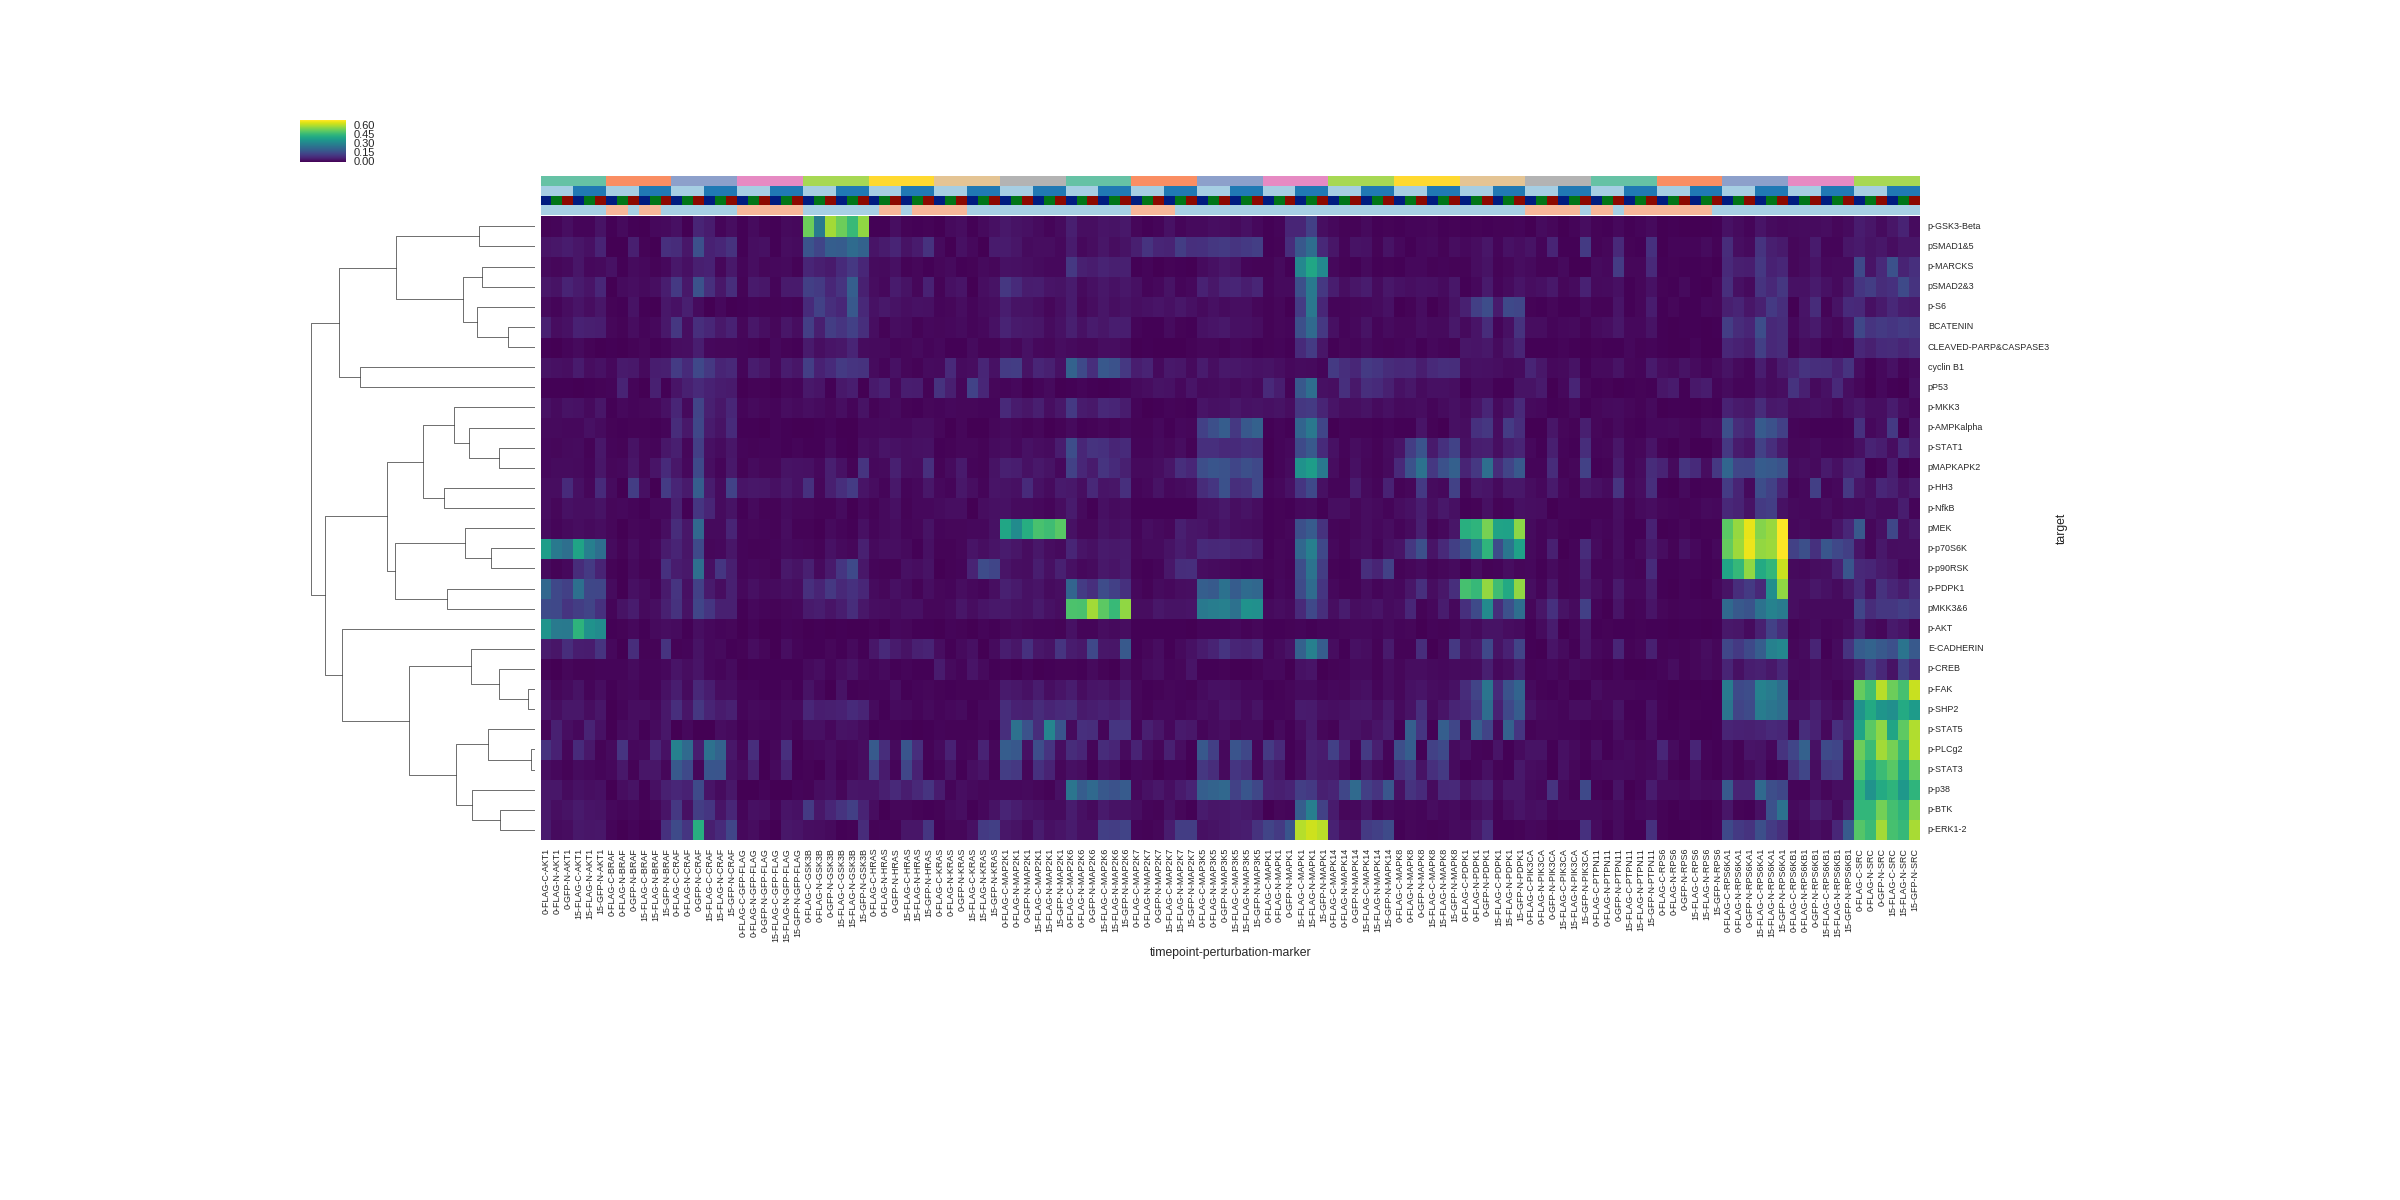

In [6]:


cg = sns.clustermap(theatmap.T, method='complete', metric='correlation',col_cluster=False,
                    cmap='viridis', figsize=(30,15),col_colors=row_cols)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
#cg.ax_heatmap.tick_params(axis='x', which='major', pad=0)
cg.fig.subplots_adjust(bottom=0.3)
cg.fig.subplots_adjust(right=0.8)
cg.fig.subplots_adjust(top=0.9)
cg.ax_heatmap.xaxis.set_tick_params(labelsize=lsize)
cg.ax_heatmap.yaxis.set_tick_params(labelsize=lsize)


# add row

-> Above is the heatmap used for Supplemenatry Figure 3e